# Sleep EEG events detection

## Intoductory notes:
This notebook presents events detection functionality:
* Spindle detection
* Slow wave detection
* Rapid eye movement detection

Recommended readings:
1. [YASA: FAQ](https://raphaelvallat.com/yasa/build/html/faq.html#event-detection)
2. [YASA: Spindle detection on specific sleep stages](https://github.com/raphaelvallat/yasa/blob/master/notebooks/03_spindles_detection_NREM_only.ipynb)
3. [YASA: SpindlesResults class](http://raphaelvallat.com/yasa/build/html/generated/yasa.SpindlesResults.html#yasa.SpindlesResults)
4. [YASA: Slow-waves detection](https://github.com/raphaelvallat/yasa/blob/master/notebooks/05_sw_detection.ipynb)
5. [YASA: Multi-channel slow-wave detection](https://github.com/raphaelvallat/yasa/blob/master/notebooks/06_sw_detection_multi.ipynb)
6. [YASA: SWResults class](https://raphaelvallat.com/yasa/build/html/generated/yasa.SWResults.html#yasa-swresults)
7. [YASA: Rapid Eye Movements (REMs) detection](https://github.com/raphaelvallat/yasa/blob/master/notebooks/07_REMs_detection.ipynb)
8. [YASA: REMResults class](https://raphaelvallat.com/yasa/build/html/generated/yasa.REMResults.html#yasa.REMResults)
9. [MNE: Time-frequency analysis: power and inter-trial coherence](https://mne.tools/stable/auto_tutorials/time-freq/20_sensors_time_frequency.html#time-frequency-analysis-power-and-inter-trial-coherence)
10. [MNE: AverageTFR class](https://mne.tools/stable/generated/mne.time_frequency.AverageTFR.html#mne-time-frequency-averagetfr)

## Import module
Add pipeline module to path and import its elements (just run this cell).

In [1]:
%matplotlib widget
import sys
sys.path.append('../sleepeeg/')
from pipeline import SpindlesPipe, SlowWavesPipe, REMsPipe

## Spindles detection

In [2]:
spindles_pipe = SpindlesPipe(
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\resampled_100hz_raw.fif",
    output_dir=r"C:\Users\Gennadiy\Documents\data\HZ4\processing",
    path_to_hypno=r"C:\Users\Gennadiy\Documents\data\HZ4\staging.txt",
    hypno_freq=1
    )

Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\resampled_100hz_raw.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 0 ... 891908 =      0.000 ...  8919.080 secs
Ready.


06-Apr-23 19:42:04 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


In [3]:
spindles_pipe.detect(
    picks="eeg",
    include=(1, 2, 3),
    freq_sp=(12, 15),
    freq_broad=(1, 30),
    duration=(0.5, 2),
    min_distance=500,
    thresh={"corr": 0.65, "rel_pow": 0.2, "rms": 1.5},
    multi_only=False,
    remove_outliers=False,
    save=True
)

06-Apr-23 19:42:08 | ERROR | Wrong data amplitude for VREF (trimmed STD = 0.000). Unit of data MUST be uV! Channel will be skipped.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 257 out of 257 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0

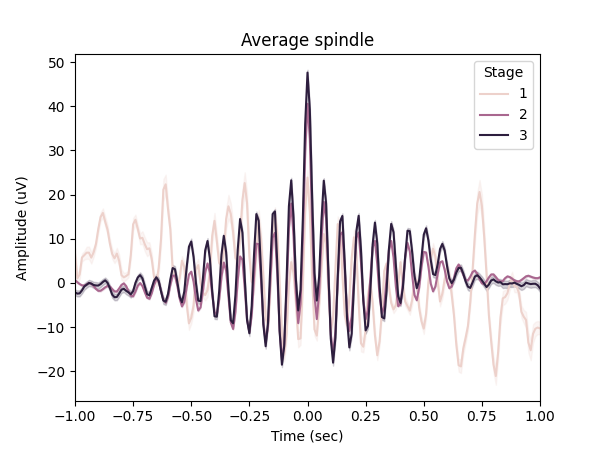

In [4]:
spindles_pipe.plot_average(save=True, hue="Stage")

In [9]:
spindles_pipe.apply_tfr(
    freqs=(10,20), 
    method='morlet', # 'morlet' or 'multitaper'
    n_freqs=100, 
    time_before=1, 
    time_after=1, 
    n_jobs=-1)
spindles_pipe.tfrs

100%|██████████| 153/153 [00:01<00:00, 109.74it/s]


{'N2': <AverageTFR | time : [-1.000000, 1.000000], freq : [10.000000, 20.000000], nave : 250, channels : 256, ~39.6 MB>,
 'N3': <AverageTFR | time : [-1.000000, 1.000000], freq : [10.000000, 20.000000], nave : 27, channels : 256, ~39.6 MB>,
 'N1': <AverageTFR | time : [-1.000000, 1.000000], freq : [10.000000, 20.000000], nave : 1, channels : 153, ~23.7 MB>}

No baseline correction applied


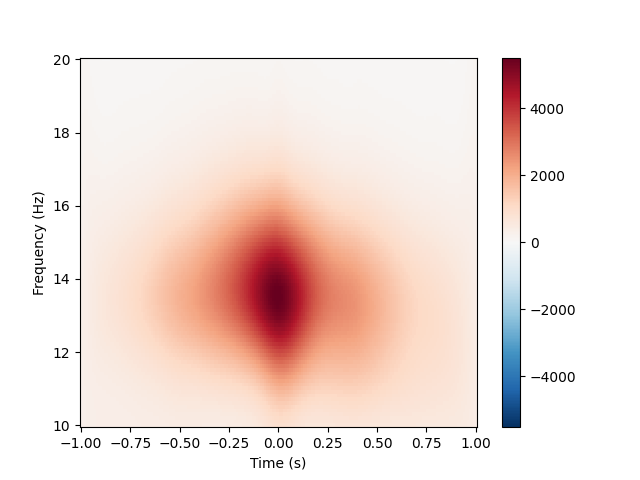

No baseline correction applied


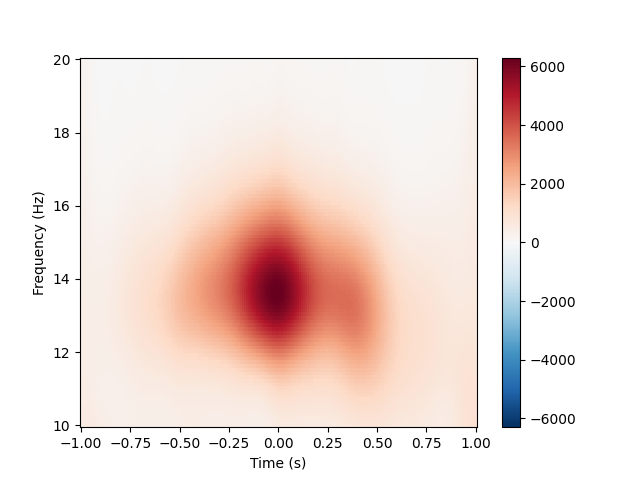

([<Figure size 640x480 with 2 Axes>], [<Figure size 640x480 with 2 Axes>])

In [10]:
spindles_pipe.tfrs['N2'].plot(['E101']), spindles_pipe.tfrs['N3'].plot(['E101'])

No baseline correction applied


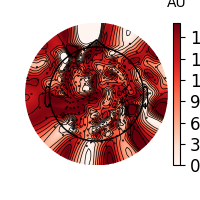

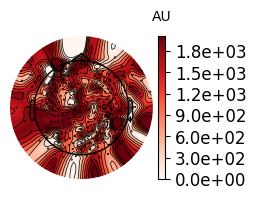

In [11]:
spindles_pipe.tfrs['N2'].plot_topomap()

In [12]:
for stage, tfr in spindles_pipe.tfrs.items():
    tfr.save(spindles_pipe.output_dir / f'spindles_{stage}_tfr.h5')

## Slow wave detection

In [13]:
slow_waves_pipe = SlowWavesPipe(
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_new_raw.fif",
    output_dir=r"C:\Users\Gennadiy\Documents\data\HZ4\processing",
    path_to_hypno=r"C:\Users\Gennadiy\Documents\data\HZ4\staging.txt",
    hypno_freq=1
    )

Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_new_raw.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 0 ... 2032249 =      0.000 ...  8128.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_new_raw-1.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 2032250 ... 2229772 =   8129.000 ...  8919.088 secs
Ready.


06-Apr-23 19:55:31 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


In [14]:
slow_waves_pipe.detect(
    picks="eeg",
    include=(1, 2, 3),
    freq_sw=(0.3, 1.5),
    dur_neg=(0.3, 1.5),
    dur_pos=(0.1, 1),
    amp_neg=(40, 200),
    amp_pos=(10, 150),
    amp_ptp=(75, 350),
    coupling=False,
    coupling_params={"freq_sp": (12, 16), "p": 0.05, "time": 1},
    remove_outliers=False,
    save=True,
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


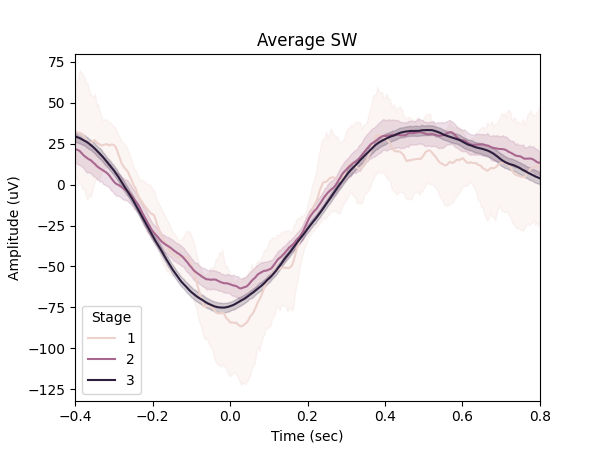

In [15]:
slow_waves_pipe.plot_average(save=True, hue="Stage")

In [19]:
slow_waves_pipe.apply_tfr(
    freqs=(0.5,5),
    method='morlet',
    n_freqs=100, 
    time_before=4, 
    time_after=4, 
    n_cycles=2,
    n_jobs=-1)

100%|██████████| 1/1 [00:00<00:00, 13.02it/s]


No baseline correction applied


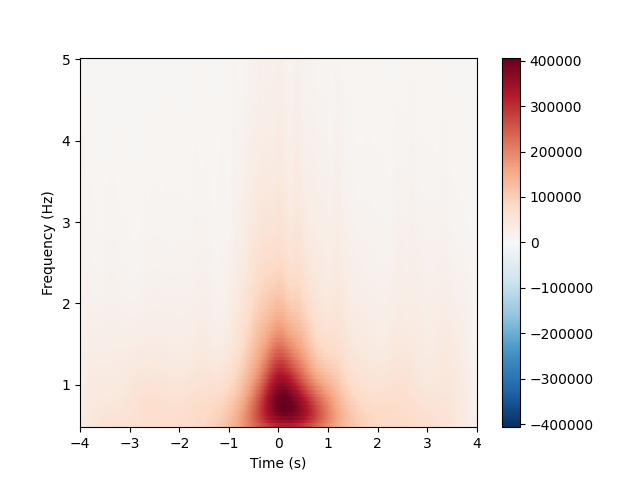

No baseline correction applied


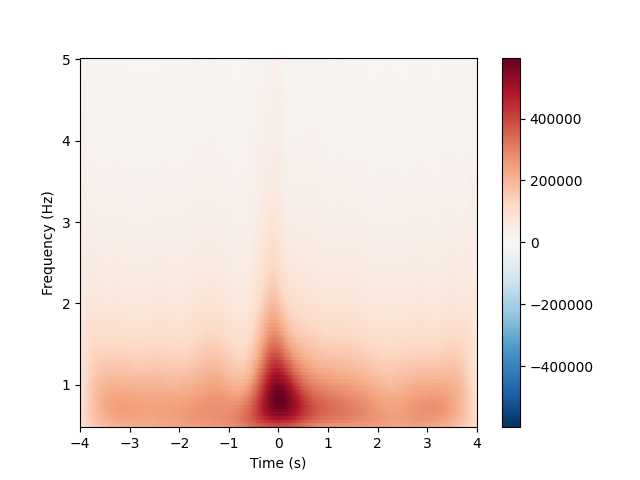

([<Figure size 640x480 with 2 Axes>], [<Figure size 640x480 with 2 Axes>])

In [22]:
slow_waves_pipe.tfrs['N2'].plot(['E101']), slow_waves_pipe.tfrs['N3'].plot(['E101'])

In [ ]:
slow_waves_pipe.tfrs['N3'].plot_topomap()

In [ ]:
for stage, tfr in slow_waves_pipe.tfrs.items():
    tfr.save(slow_waves_pipe.output_dir / f'slow_waves_{stage}_tfr.h5')

## Rapid eye movements detection

In [2]:
rems_pipe = REMsPipe(
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_new_raw.fif",
    output_dir=r"C:\Users\Gennadiy\Documents\data\HZ4\processing",
    path_to_hypno=r"C:\Users\Gennadiy\Documents\data\HZ4\staging.txt",
    hypno_freq=1
    )

Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_new_raw.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 0 ... 2032249 =      0.000 ...  8128.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_new_raw-1.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 2032250 ... 2229772 =   8129.000 ...  8919.088 secs
Ready.


01-Apr-23 21:35:18 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


In [3]:
rems_pipe.detect(
    loc_chname="E252",
    roc_chname="E226",
    include=4,
    freq_rem=(0.5, 5),
    duration=(0.3, 1.2),
    amplitude=(50, 325),
    remove_outliers=False,
    save=True
)

Setting 214732 of 2229773 (9.63%) samples to NaN, retaining 2015041 (90.37%) samples.
Setting 214732 of 2229773 (9.63%) samples to NaN, retaining 2015041 (90.37%) samples.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


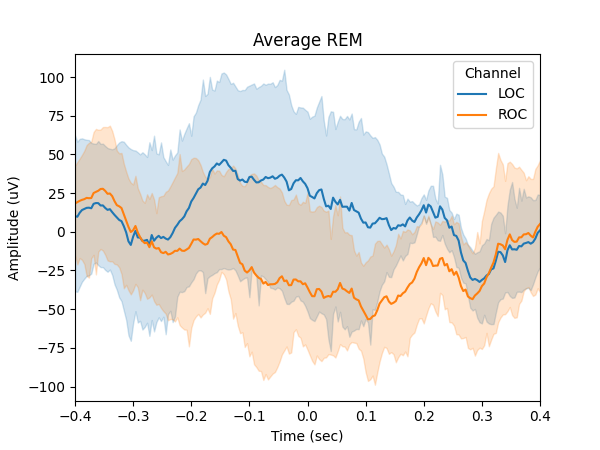

In [4]:
rems_pipe.plot_average(save=True)